# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Data

In [2]:
df = pd.read_csv("../data/PostTypeAnalysisDateset.csv", parse_dates=["post_date"])

# Basic Inspection

In [3]:
df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
0,2020-01-02 17:10:00,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,36023.36585,123,3,42,0.000693
1,2020-01-02 17:46:00,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,23402.68323,4,0,0,0.000017
2,2020-10-09 16:06:00,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,204639.92030,24,1,2,0.000013
3,2020-10-09 16:08:00,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,208872.73630,91,1,2,0.000045
4,2020-10-10 13:00:00,4A3372EBDC9C484AA8503A96CD14B858,1023570.0,False,False,NaN,136020.57130,465,9,2,0.000465


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15141 entries, 0 to 15140
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   post_date            15141 non-null  datetime64[ns]
 1   entity_id            15141 non-null  object        
 2   followers            15127 non-null  float64       
 3   is_picture           15141 non-null  bool          
 4   is_video             15141 non-null  bool          
 5   video_duration_secs  1989 non-null   float64       
 6   impressions          15127 non-null  float64       
 7   likes                15141 non-null  int64         
 8   shares               15141 non-null  int64         
 9   replies              15141 non-null  int64         
 10  engagement_rate      15141 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 1.1+ MB


### There are some nulls

In [6]:
df.isnull().sum()

post_date                  0
entity_id                  0
followers                 14
is_picture                 0
is_video                   0
video_duration_secs    13152
impressions               14
likes                      0
shares                     0
replies                    0
engagement_rate            0
dtype: int64

### Specifics above

# Deep Dive into `post_date`

In [8]:
lastest_date, earliest_date = max(df["post_date"]), min(df["post_date"])
print(earliest_date, lastest_date)

2020-01-01 05:01:00 2020-12-16 04:02:00


In [13]:
df[df["post_date"].dt.second != 0].shape # confirming that seconds aren't accounted for

(0, 11)

In [59]:
df["post_date"].isnull().sum()

0

### Posts in this dataset are from the year 2020, January 1st to December 16th
### Pretty granular, precision to the minute
### No NaN times

# Deep Dive into `entity_id`

In [14]:
df["entity_id"].nunique() # there are only 5 accounts this dataset covers

5

In [15]:
df["entity_id"].unique() # confirming the hash means nothing to me

array(['7AD030340F434EECA5B4FC28034E1113',
       '4AAFEFB838974FDCA41932C4D32FD52A',
       '4A3372EBDC9C484AA8503A96CD14B858',
       '734CC11FE5EC4290A623F16482B387FF',
       '40B1ADC3F6F54143BACCB3D8FB000756'], dtype=object)

In [16]:
df["entity_id"].value_counts() # check distribution of posts by account

4A3372EBDC9C484AA8503A96CD14B858    8228
4AAFEFB838974FDCA41932C4D32FD52A    2550
7AD030340F434EECA5B4FC28034E1113    2317
734CC11FE5EC4290A623F16482B387FF    1121
40B1ADC3F6F54143BACCB3D8FB000756     925
Name: entity_id, dtype: int64

In [61]:
df["entity_id"].isnull().sum()

0

### There are only 5 accounts and account `4A3372EBDC9C484AA8503A96CD14B858` has by far the most posts. The others are relativley even
### No NaNs in entit_ id

# Deep Dive into `followers`

In [18]:
df["followers"].describe() # some descriptive stats

count    1.512700e+04
mean     1.292527e+06
std      1.091380e+06
min      2.420370e+05
25%      9.004100e+05
50%      9.583550e+05
75%      1.065397e+06
max      5.149433e+06
Name: followers, dtype: float64

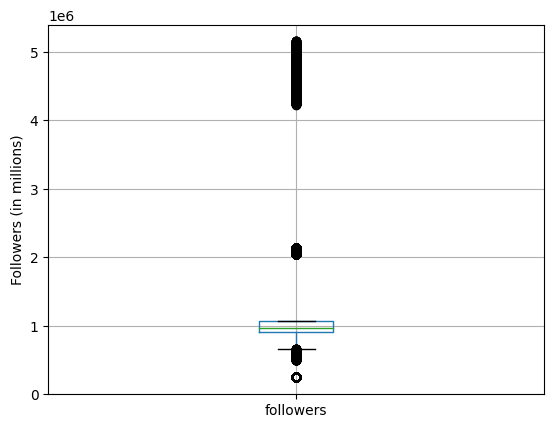

In [27]:
follow_bbplot = df.boxplot("followers")
follow_bbplot.set_ylabel("Followers (in millions)")
plt.show()

## Look at how `followers` interacts with `entity_id`

Is there a difference in followers by account?

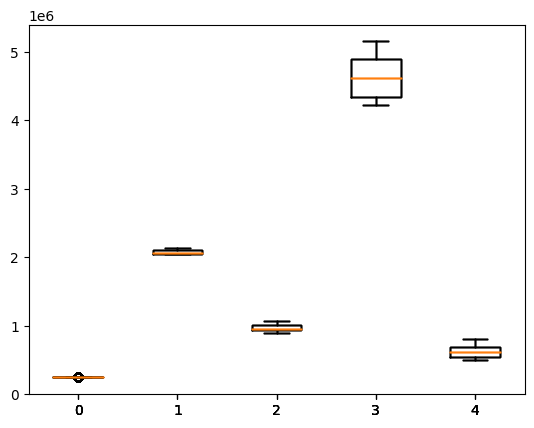

In [72]:
followers_by_account = []
for account in df["entity_id"].unique():
    temp = df[df["entity_id"] == account].dropna(subset=["followers"]).copy()
    followers_by_account.append(temp["followers"])
plt.boxplot(followers_by_account, labels=range(0, 5))
plt.show()

### The above graph is in milions, also the x value corresponds to index in df["entity_id"].unique()
### There's a pretty big difference in followers by account

## Look at how `followers` by `entity_id` change over time

In [142]:
group_on_acc = []
for name in df["entity_id"].unique():
    group_on_acc.append(
        df[df["entity_id"] == name].dropna(
            subset=["followers"]
        ).sort_values(axis=0, by="post_date").reset_index(
        ).copy())

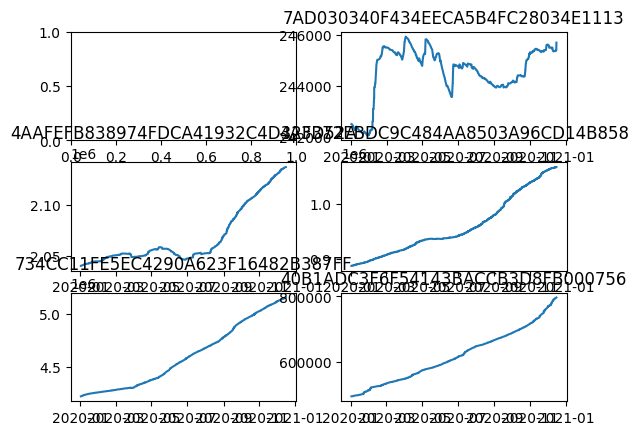

In [144]:
fig, ax = plt.subplots(3, 2)
row, col = 0, 0
for idx in range(len(group_on_acc)):
    if (idx % 2) == 0:
        col = 1
    else:
        col = 0
        row += 1
    ax[row, col].plot(group_on_acc[idx]["post_date"], group_on_acc[idx]["followers"])
    ax[row, col].set_title(group_on_acc[idx]["entity_id"][0])
    # row += 1
plt.show()

# df.groupby("entity_id").plot("post_date", "followers", title=df["entity_id"][0])
# plt.show()

### All except the last account seem to follow a general upward trend. May not want to do what last account does as it's quite volatile

## Look at growth rate by account over time

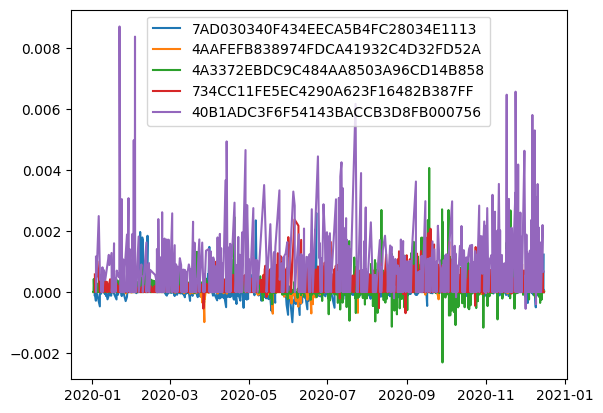

In [153]:
# for no good reason, i cant make changes to a groupby fo growth rate by acc is not possible to do programatically
for frame in group_on_acc:
    frame["growth_rate"] = frame["followers"].diff() / frame["followers"]
    plt.plot(frame["post_date"], frame["growth_rate"], label=frame["entity_id"][0])
plt.legend()
plt.show()

# Look into NaNs more
- for 14 posts, followers and impressions are NaN so probably drop them
- a-lot of video duration is NaN, probably fine I reckon it's because video = False

In [ ]:
# df[df.is_video == False].shape # yeah that's why
df[df.is_picture & df.is_video].shape, df[~df.is_picture & ~df.is_video].shape, df[~df.is_picture & df.is_video].shape, df[df.is_picture & ~df.is_video].shape, df.shape, 8464 + 1989 + 4688 == 15141

# How do videos do vs non-videos?

In [ ]:
df[df.is_picture].shape, df[df.is_video].shape

In [ ]:
df.is_video.value_counts()

In [ ]:
# df.engagement_rate.hist(by=df.is_video)

In [ ]:
# df[df.is_video].engagement_rate.plot.density(), df[~df.is_video].engagement_rate.plot.density()

In [ ]:
# df.corr()

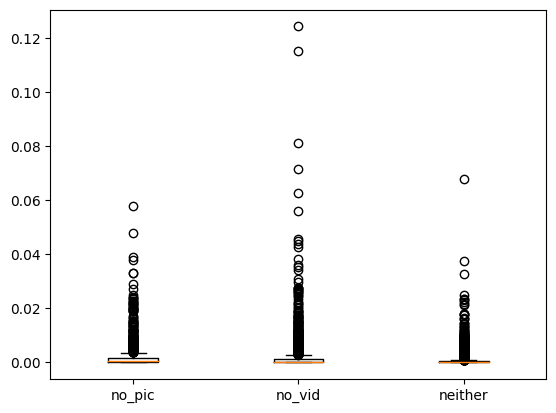

In [42]:
no_pic = df[~df.is_picture & df.is_video].copy()
no_vid = df[df.is_picture & ~df.is_video].copy()
neither = df[~df.is_picture & ~df.is_video].copy()
plt.boxplot([no_pic["engagement_rate"], no_vid["engagement_rate"], neither["engagement_rate"]], labels=["no_pic", "no_vid", "neither"])
plt.show()

In [ ]:
df.entity_id.nunique()